In [ ]:
# esse codifo foi usado para tratar a base de dados

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# file_path = 'Crânios Egípcios.csv'
# df_cleaned = pd.read_csv('Crânios Egípcios.csv', skiprows=1)

# # Rename columns based on the content from the header rows
# df_cleaned.columns = ['Crânios', 'Primitivo_X1', 'Primitivo_X2', 'Primitivo_X3', 'Primitivo_X4',
#                       'Antigo_X1', 'Antigo_X2', 'Antigo_X3', 'Antigo_X4',
#                       'Dinastias_X1', 'Dinastias_X2', 'Dinastias_X3', 'Dinastias_X4',
#                       'Ptolemaico_X1', 'Ptolemaico_X2', 'Ptolemaico_X3', 'Ptolemaico_X4',
#                       'Romano_X1', 'Romano_X2', 'Romano_X3', 'Romano_X4']

# # Initialize lists to hold the data for the new DataFrame
# X1 = []
# X2 = []
# X3 = []
# X4 = []
# labels = []

# # Define the period map
# period_map = {
#     'Primitivo': 'Pré-dinástico primitivo',
#     'Antigo': 'Pré-dinástico antigo',
#     'Dinastias': '12 e 13 dinastias',
#     'Ptolemaico': 'Período ptolemaico',
#     'Romano': 'Período romano'
# }

# # Iterate through each row in the dataframe
# for idx in range(len(df_cleaned)):
#   sample = df_cleaned.iloc[idx]

#   # Iterate through each column and assign values based on the period
#   for period, label in period_map.items():
#       for col in range(1, 5):  # Iterate through X1 to X4
#         col_name = f'{period}_X{col}'
#         if col_name in sample and not pd.isnull(sample[col_name]):
#           if col == 1:
#             X1.append(sample[col_name])
#           elif col == 2:
#             X2.append(sample[col_name])
#           elif col == 3:
#             X3.append(sample[col_name])
#           elif col == 4:
#             X4.append(sample[col_name])
#       labels.append(label)

# # Check that all arrays have the same length
# print(f"X1: {len(X1)}\nX2: {len(X2)}\nX3: {len(X3)}\nX4: {len(X4)}\nLabels: {len(labels)}")

# # Create a DataFrame with the selected columns
# df_final = pd.DataFrame({
#     'X1': X1,
#     'X2': X2,
#     'X3': X3,
#     'X4': X4,
#     'label': labels
# })

# # Display the first few rows to check the result
# print(df_final.head())

# # Save the formatted dataset to a new CSV file
# df_final.to_csv('Crânios Egípcios Formatado.csv', index=False)


X1: 150
X2: 150
X3: 150
X4: 150
Labels: 150
    X1   X2   X3  X4                    label
0  131  138   89  49  Pré-dinástico primitivo
1  124  138  101  48     Pré-dinástico antigo
2  137  141   96  52        12 e 13 dinastias
3  137  134  107  54       Período ptolemaico
4  137  123   91  50           Período romano


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Crânios Egípcios Formatado.csv')
data = np.array(df)
df.head()

,X1,X2,X3,X4,label
0,131,138,89,49,Pré-dinástico primitivo
1,124,138,101,48,Pré-dinástico antigo
2,137,141,96,52,12 e 13 dinastias
3,137,134,107,54,Período ptolemaico
4,137,123,91,50,Período romano


In [9]:
print(f'O data freme contem: {df.shape[0]} linhas ')
print(f'O data freme contem: {df.shape[1]} coluns ')

O data freme contem: 150 linhas 
O data freme contem: 5 coluns 


In [33]:
# mediana dos valores de cada coluna

grouped = df.groupby(["label"]).median()
display(grouped)


,X1,X2,X3,X4
label,,,,
12 e 13 dinastias,136.0,133.5,96.0,50.0
Período ptolemaico,135.0,132.0,94.5,52.0
Período romano,137.0,130.0,94.0,52.0
Pré-dinástico antigo,132.0,133.0,98.5,50.5
Pré-dinástico primitivo,131.0,134.0,100.0,50.0


In [11]:
# media  dos valores de cada coluna
grouped = df.groupby(["label"]).mean()
display(grouped)

,X1,X2,X3,X4
label,,,,
12 e 13 dinastias,134.466667,133.800000,96.033333,50.566667
Período ptolemaico,135.500000,132.300000,94.533333,51.966667
Período romano,136.166667,130.333333,93.500000,51.366667
Pré-dinástico antigo,132.366667,132.700000,99.066667,50.233333
Pré-dinástico primitivo,131.366667,133.600000,99.166667,50.533333


In [12]:
# moda dos valores de cada coluna

def calcular_moda(serie):
    modas = serie.mode()
    return ', '.join(map(str, modas))

# Agrupando pelo período histórico (label) e calculando a moda para as colunas X1, X2, X3 e X4
moda_por_periodo = df.groupby('label').agg(calcular_moda)

# Exibindo o resultado
moda_por_periodo

,X1,X2,X3,X4
label,,,,
12 e 13 dinastias,136,133,96,50
Período ptolemaico,131,130,"90, 95, 99",53
Período romano,137,135,92,52
Pré-dinástico antigo,131,136,98,"48, 51, 53"
Pré-dinástico primitivo,131,"134, 136","93, 100",50


In [13]:
# valores maximos e minimos e desvio padrão
def calcular_amplitude(serie):
    return serie.max() - serie.min()

amplitude = df.groupby('label').agg(['max', 'min', calcular_amplitude])
amplitude

X1                           X2       \
                         max  min calcular_amplitude  max  min   
label                                                            
12 e 13 dinastias        140  126                 14  145  123   
Período ptolemaico       144  129                 15  142  120   
Período romano           147  126                 21  138  120   
Pré-dinástico antigo     148  123                 25  145  124   
Pré-dinástico primitivo  141  119                 22  143  121   

                                             X3                         X4  \
                        calcular_amplitude  max min calcular_amplitude max   
label                                                                        
12 e 13 dinastias                       22  106  87                 19  60   
Período ptolemaico                      22  107  86                 21  60   
Período romano                          18  103  81                 22  58   
Pré-dinástico antigo                    21  107  90                 17  56   
Pré-dinástico primitivo                 22  114  89                 25  56   

                                                
                        min calcular_amplitude  
label                                           
12 e 13 dinastias        45                 15  
Período ptolemaico       46                 14  
Período romano           44                 14  
Pré-dinástico antigo     45                 11  
Pré-dinástico primitivo  44                 12

In [14]:
#  desviu padrão e variancia dos dados
desvio_variancia_por_periodo = df.groupby('label').agg(['std', 'var'])

# Exibindo o resultado
desvio_variancia_por_periodo

X1                   X2                   X3  \
                              std        var       std        var       std   
label                                                                         
12 e 13 dinastias        3.481313  12.119540  4.978575  24.786207  4.552251   
Período ptolemaico       3.919448  15.362069  5.133729  26.355172  4.591847   
Período romano           5.350368  28.626437  4.971181  24.712644  5.056576   
Pré-dinástico antigo     4.810071  23.136782  4.647209  21.596552  4.346488   
Pré-dinástico primitivo  5.129249  26.309195  4.469051  19.972414  5.884423   

                                          X4             
                               var       std        var  
label                                                    
12 e 13 dinastias        20.722989  3.549486  12.598851  
Período ptolemaico       21.085057  2.822121   7.964368  
Período romano           25.568966  3.718392  13.826437  
Pré-dinástico antigo     18.891954  2.955805   8.736782  
Pré-dinástico primitivo  34.626437  2.763473   7.636782

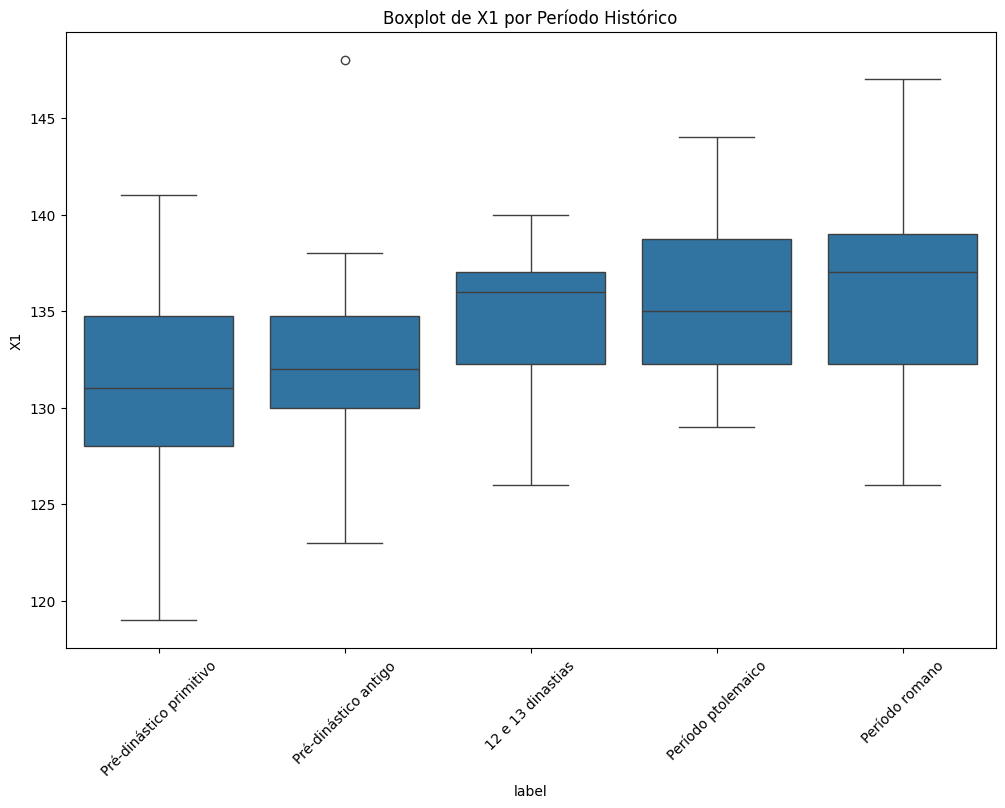

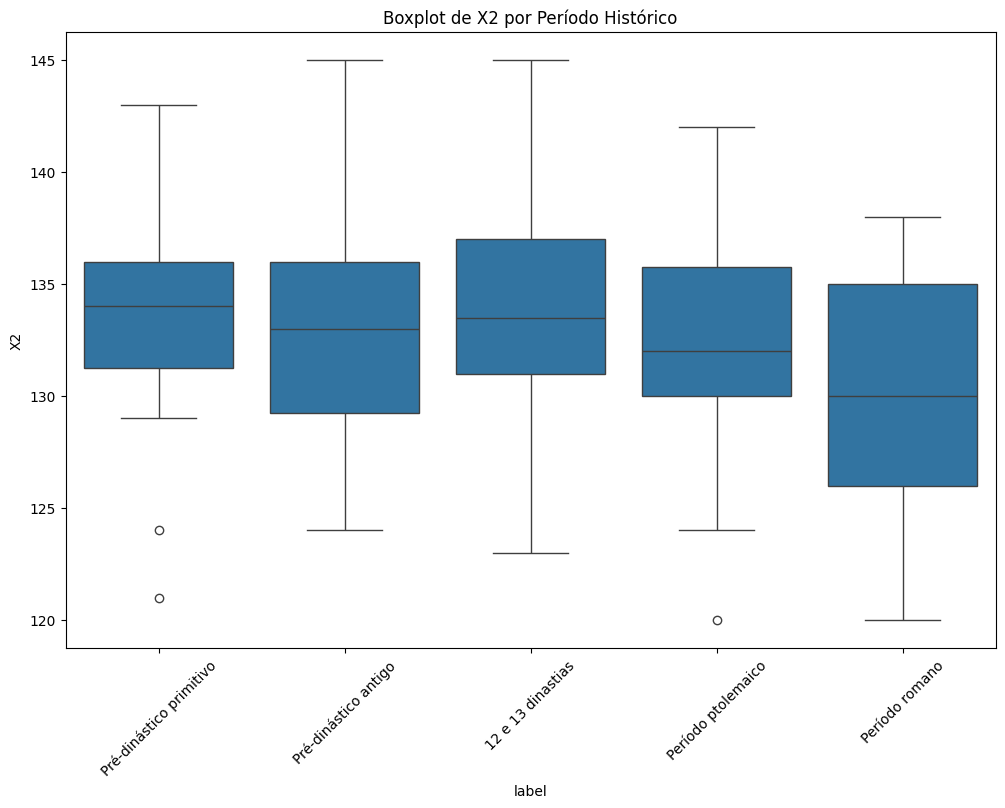

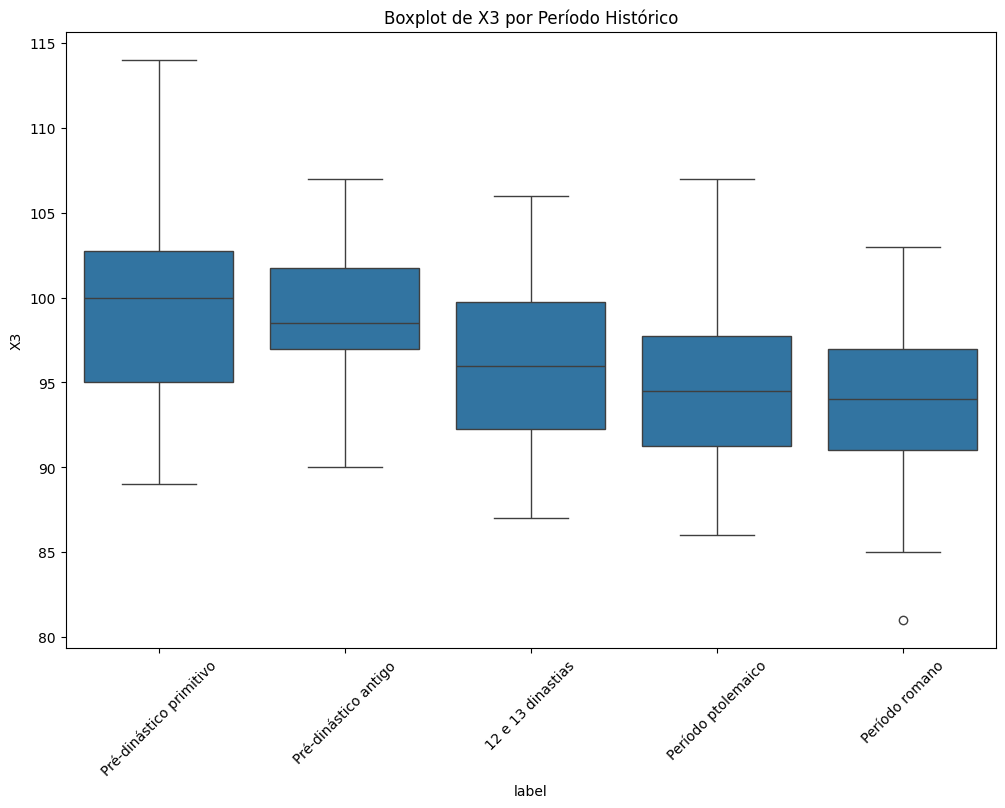

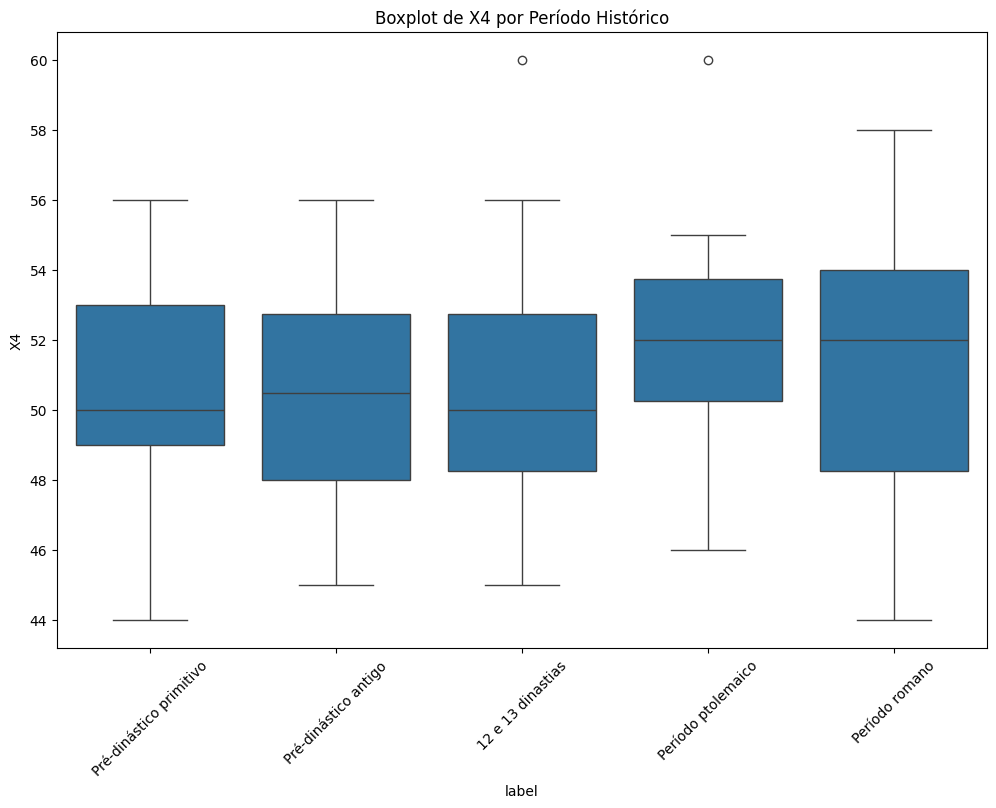

In [32]:

lista_periodos=['Pré-dinástico primitivo','Pré-dinástico antigo', '12 e 13 dinastias',
     'Período ptolemaico','Período romano']
colunas = ['X1', 'X2', 'X3', 'X4']

# Loop para gerar um boxplot para cada variável
for coluna in colunas:
    plt.figure(figsize=(12, 8))  # Define o tamanho da figura
    sns.boxplot(x='label', y=coluna, data=df)
    plt.title(f'Boxplot de {coluna} por Período Histórico')
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
    plt.show()


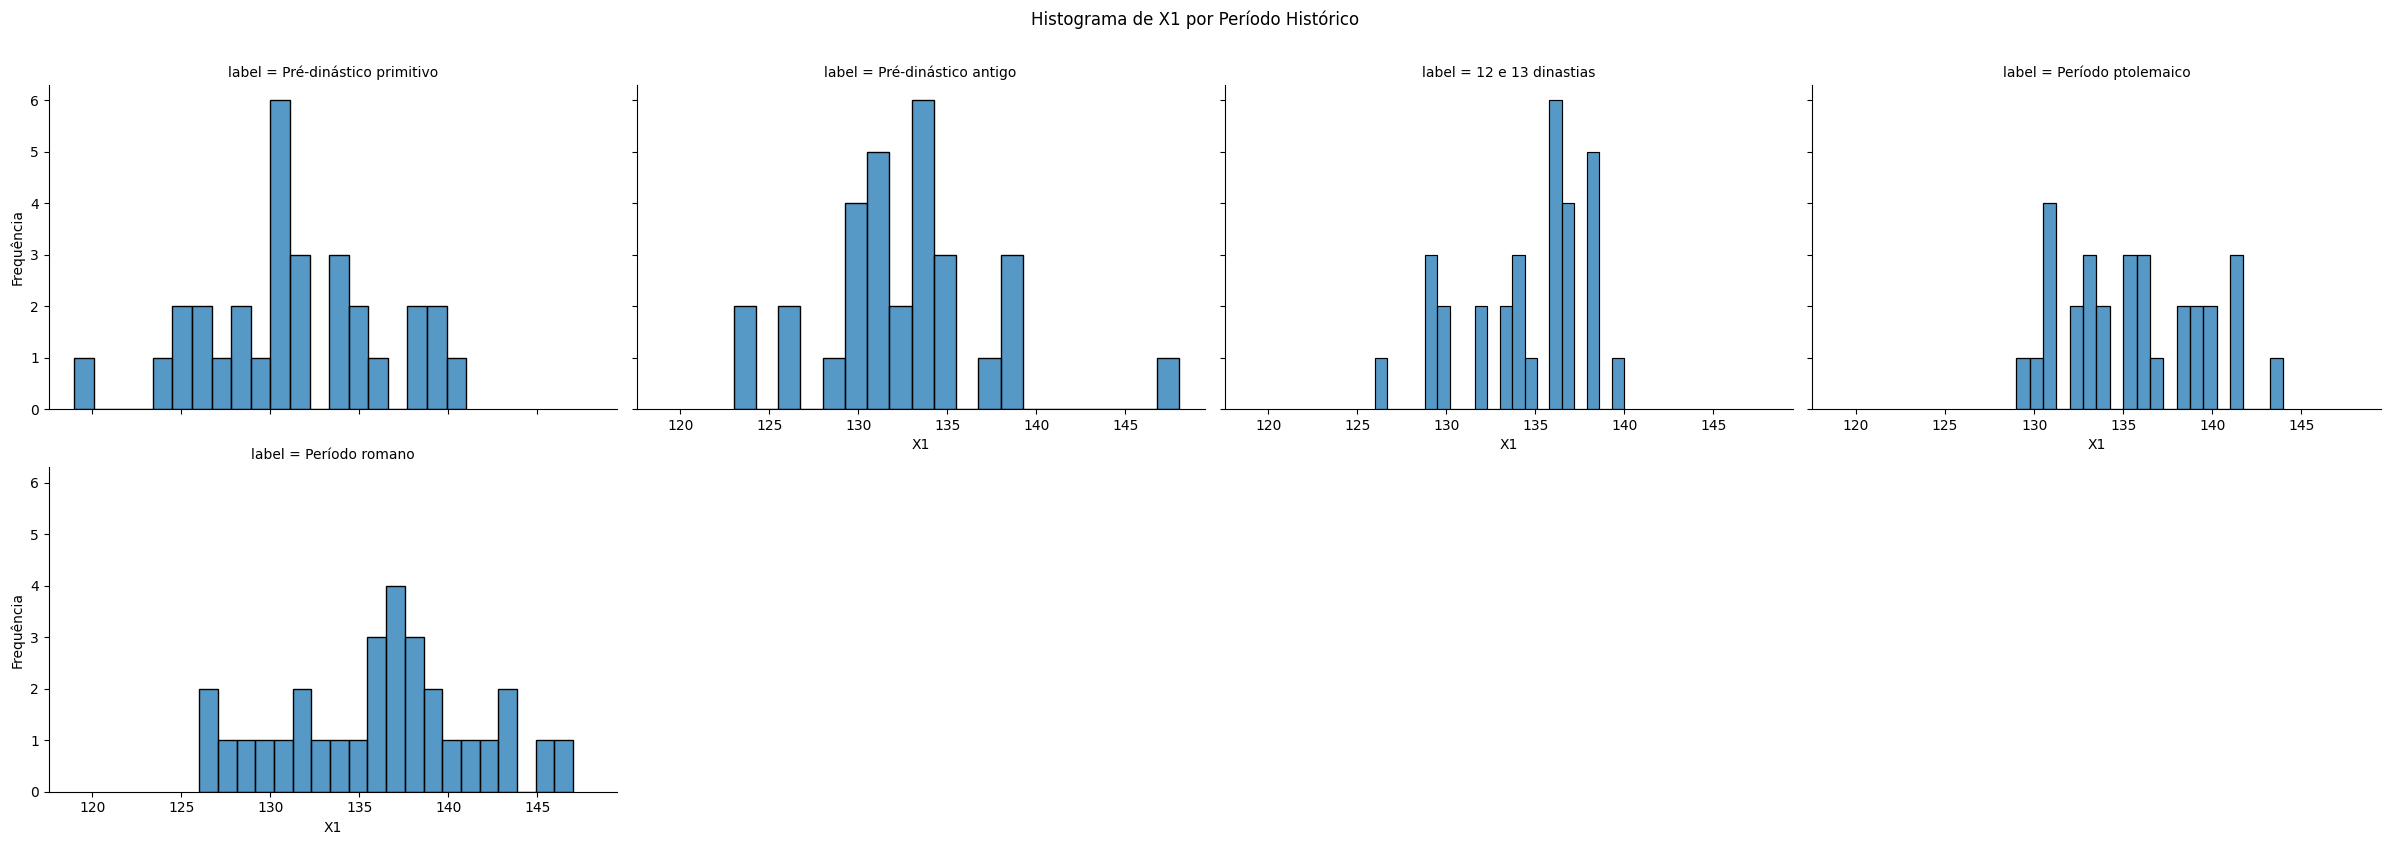

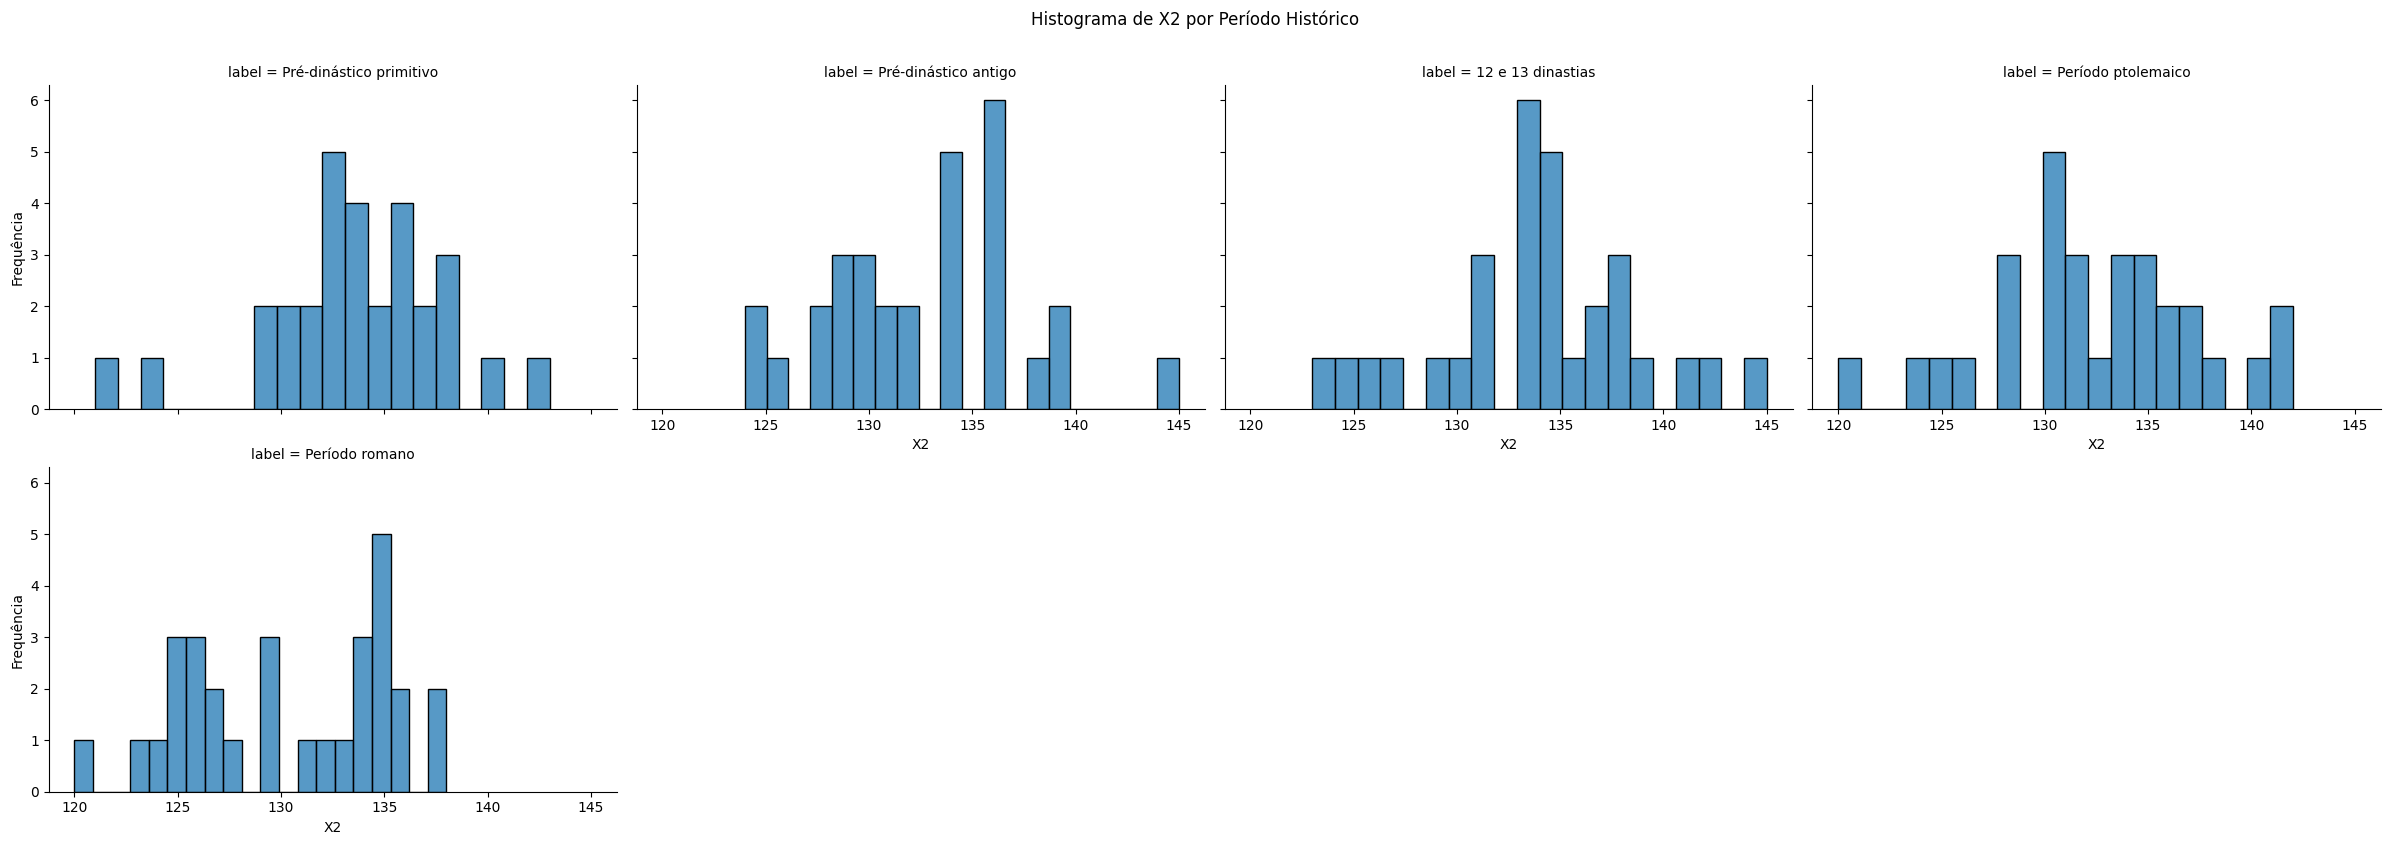

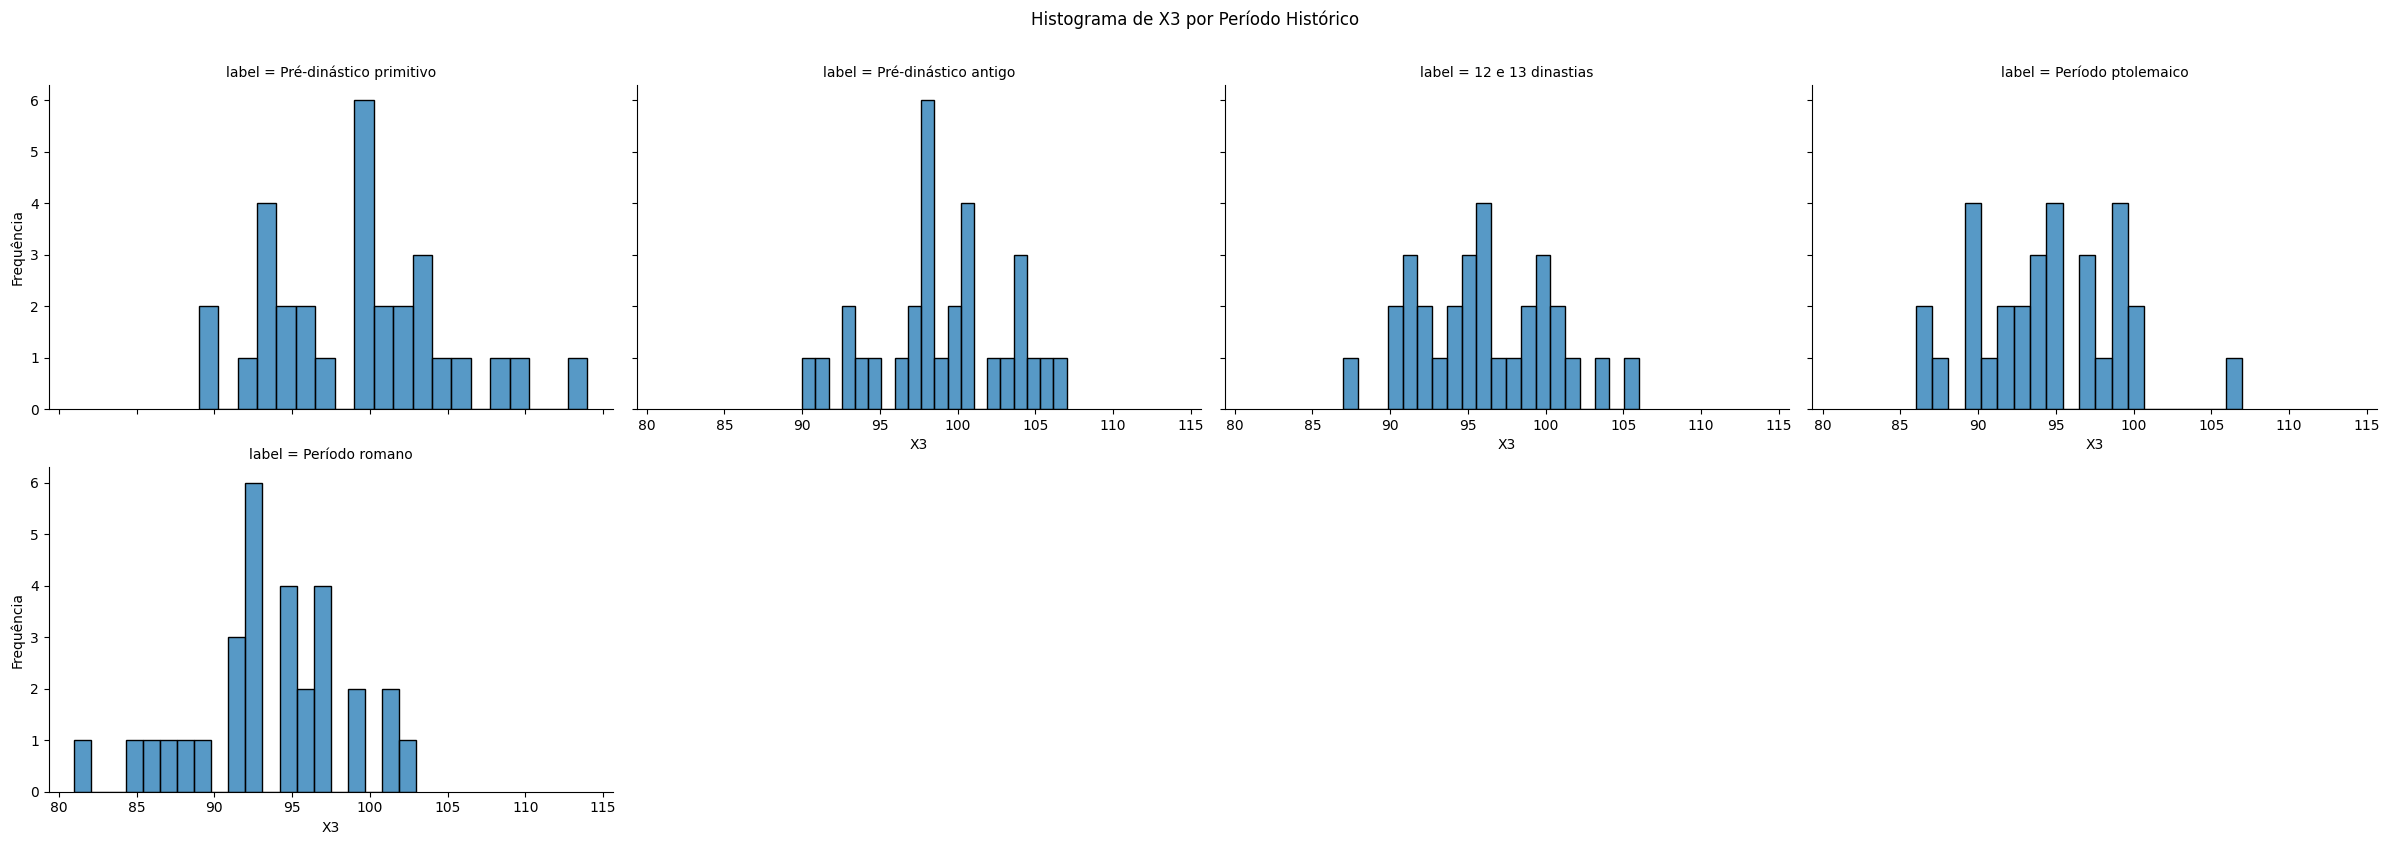

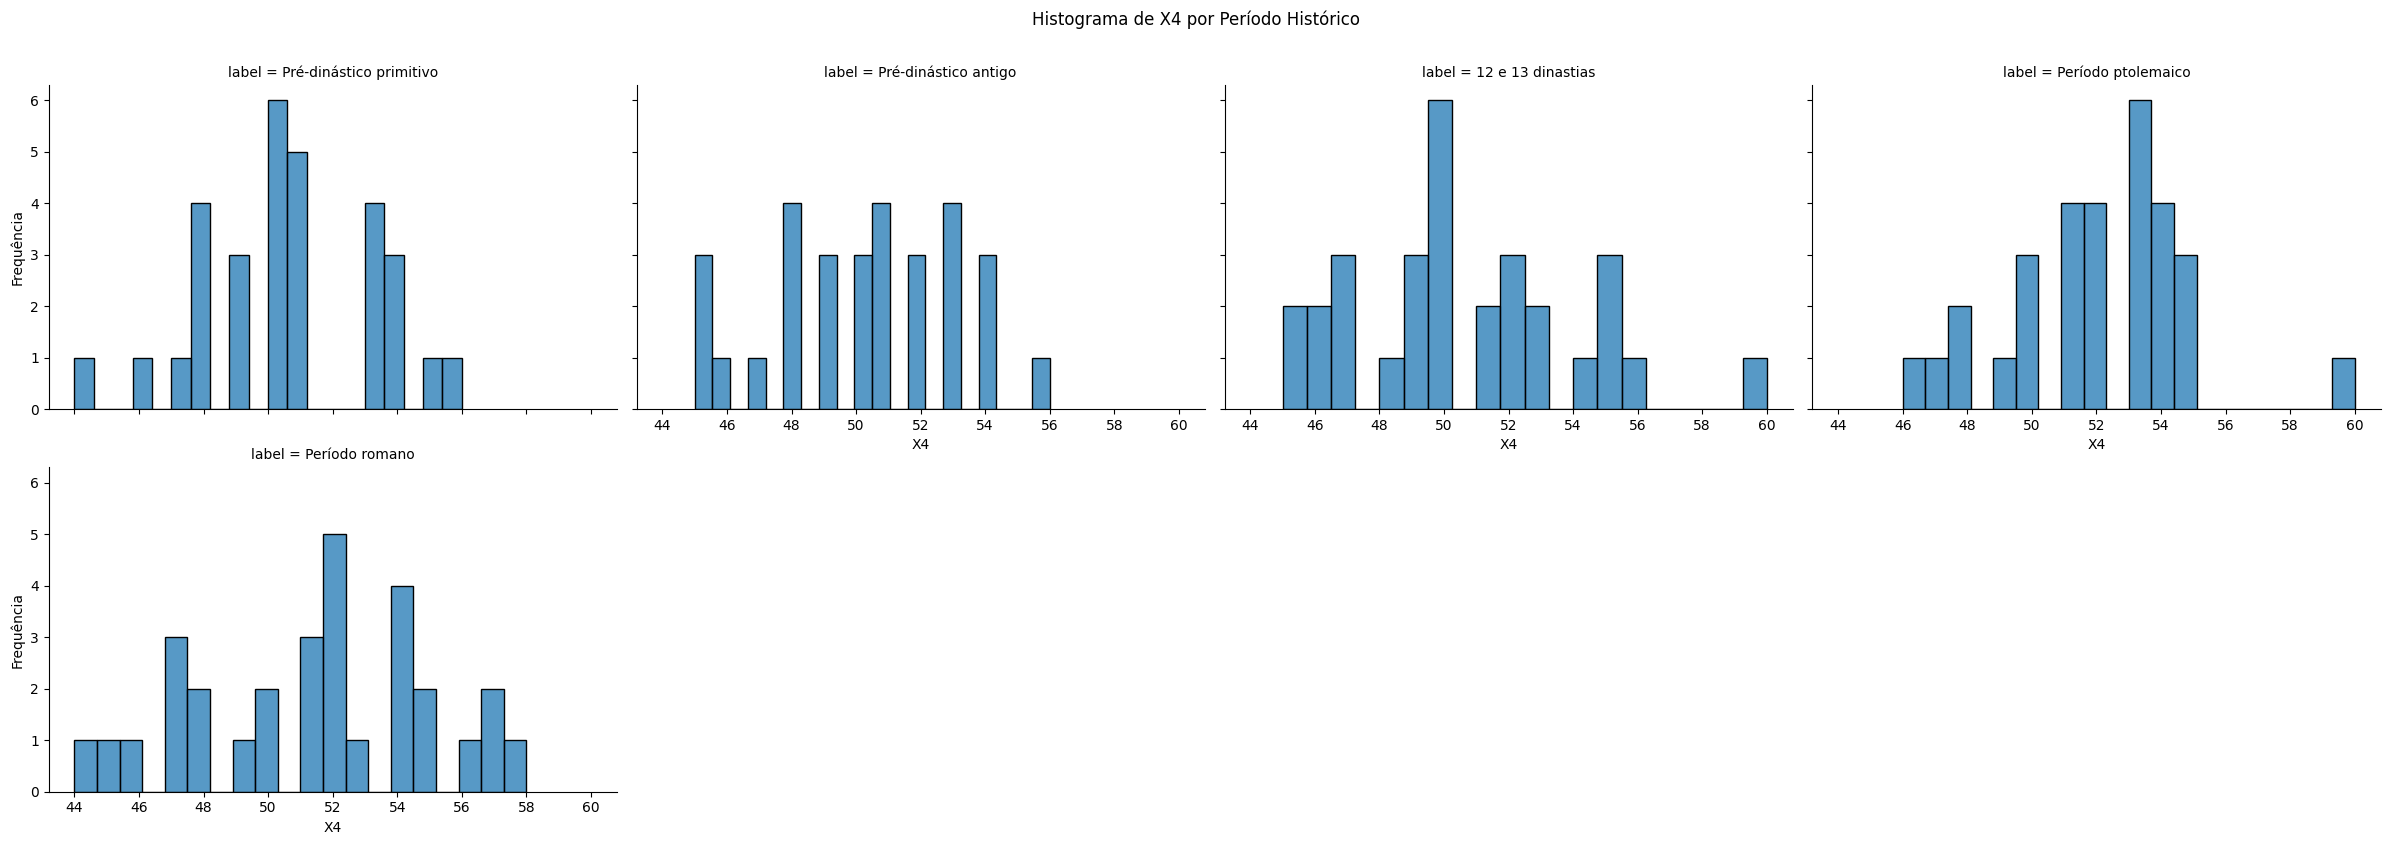

In [ ]:

colunas = ['X1', 'X2', 'X3', 'X4']

for coluna in colunas:
    g = sns.FacetGrid(df, col='label', col_wrap=4, height=4, aspect=1.5)  # Cria grid de gráficos, um por período histórico
    g.map(sns.histplot, coluna, bins=20, kde=False)  # Aplica o histograma para cada variável
    g.set_axis_labels(coluna, "Frequência")  # Define os rótulos dos eixos
    g.fig.suptitle(f'Histograma de {coluna} por Período Histórico', y=1.05)  # Título do gráfico
    plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
    plt.show()


 Pré-dinástico primitivo 

          X1        X2        X3        X4
X1  1.000000  0.181117  0.015043  0.511197
X2  0.181117  1.000000 -0.030159  0.031830
X3  0.015043 -0.030159  1.000000 -0.118042
X4  0.511197  0.031830 -0.118042  1.000000


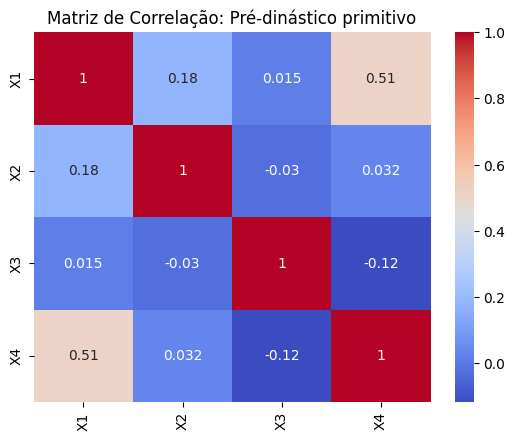


 Pré-dinástico antigo 

          X1        X2        X3        X4
X1  1.000000  0.045199  0.228050  0.129595
X2  0.045199  1.000000  0.166618  0.409438
X3  0.228050  0.166618  1.000000  0.014852
X4  0.129595  0.409438  0.014852  1.000000


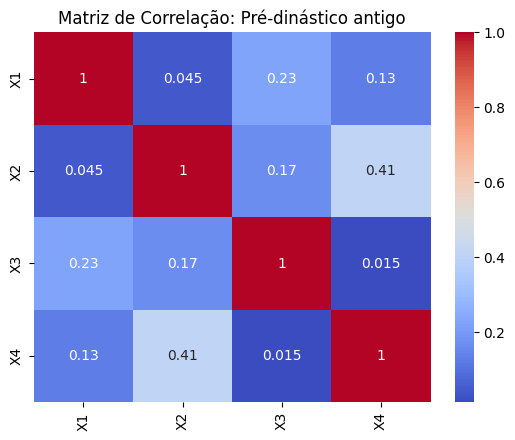


 12 e 13 dinastias 

          X1        X2        X3        X4
X1  1.000000  0.045362 -0.048885  0.072741
X2  0.045362  1.000000  0.158540 -0.005073
X3 -0.048885  0.158540  1.000000  0.103361
X4  0.072741 -0.005073  0.103361  1.000000


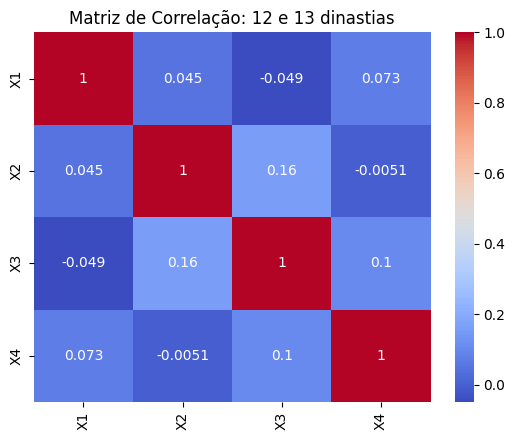


 Período ptolemaico 

          X1        X2        X3        X4
X1  1.000000 -0.275055 -0.120706  0.185489
X2 -0.275055  1.000000  0.344048  0.424370
X3 -0.120706  0.344048  1.000000  0.411208
X4  0.185489  0.424370  0.411208  1.000000


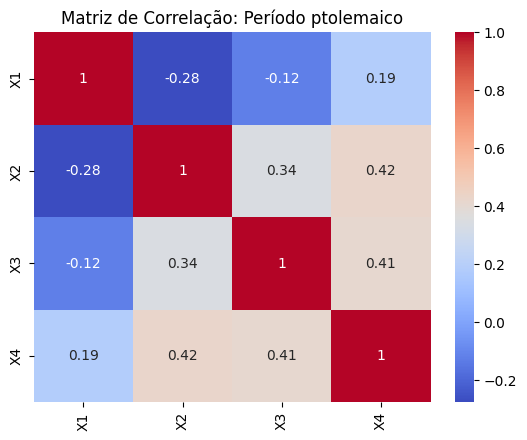


 Período romano 

          X1        X2        X3        X4
X1  1.000000 -0.008643 -0.069464 -0.100240
X2 -0.008643  1.000000  0.466407  0.116281
X3 -0.069464  0.466407  1.000000  0.021091
X4 -0.100240  0.116281  0.021091  1.000000


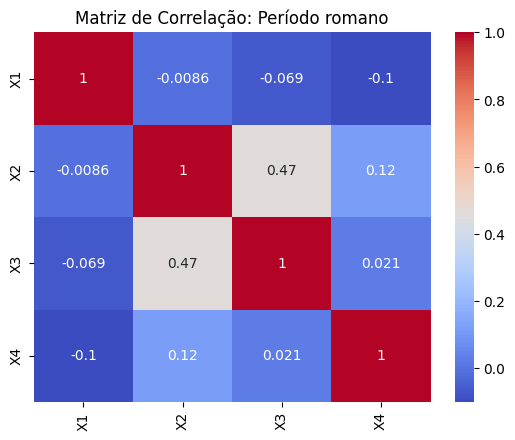

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de períodos históricos
lista_periodos = [
    'Pré-dinástico primitivo',
    'Pré-dinástico antigo',
    '12 e 13 dinastias',
    'Período ptolemaico',
    'Período romano'
]

# Agrupando o DataFrame por 'label'
grupo = df.groupby('label')

# Iterando sobre cada período na lista
for periodo in lista_periodos:
    # Obtendo o grupo correspondente ao período
    grupo_A = grupo.get_group(periodo)

    # Removendo a coluna 'label' para calcular a correlação apenas com os dados numéricos
    grupo_A = grupo_A.drop('label', axis=1)

    # Calculando a matriz de correlação
    correlation_matrix = grupo_A.corr()

    # Exibindo o nome do período e a matriz de correlação
    print(f'\n {periodo} \n')
    print(correlation_matrix)

    # Criando um gráfico de calor (heatmap) da matriz de correlação
    plt.figure()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Matriz de Correlação: {periodo}')
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# clf = tree.DecisionTreeClassifier()

X = df.drop(columns='label')  # Colunas de características
y = df['label']  # Variável alvo

# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_arvore = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
modelo_arvore.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = modelo_arvore.predict(X_test)

# Avaliando o desempenho
acuracia = accuracy_score(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)

print(f'Acurácia: {acuracia}')
print(f'Relatório de Classificação:\n{relatorio_classificacao}')

Acurácia: 0.13333333333333333
Relatório de Classificação:
                         precision    recall  f1-score   support

      12 e 13 dinastias       0.00      0.00      0.00         4
     Período ptolemaico       0.25      0.12      0.17         8
         Período romano       0.00      0.00      0.00         6
   Pré-dinástico antigo       0.33      0.29      0.31         7
Pré-dinástico primitivo       0.14      0.20      0.17         5

               accuracy                           0.13        30
              macro avg       0.15      0.12      0.13        30
           weighted avg       0.17      0.13      0.14        30



In [30]:
import pandas as pd
import numpy as np

# Função para calcular a moda (a moda pode ter mais de um valor, então pegamos o primeiro)
def mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan

# Calcula as métricas (max, min, mean, mode, std, var) para cada grupo (label)
grouped_max = df.groupby("label").max()
grouped_min = df.groupby("label").min()
grouped_mean = df.groupby("label").mean()
grouped_mode = df.groupby("label").agg(mode)
grouped_std = df.groupby("label").std()
grouped_var = df.groupby("label").var()

# Organizando os resultados em um novo DataFrame
metrics_df = pd.DataFrame()

# Para cada coluna (X1, X2, X3, X4), adicionar as métricas como colunas e organizar as colunas numéricas como linhas
for col in ['X1', 'X2', 'X3', 'X4']:
    metrics_df[col + '_max'] = grouped_max[col]
    metrics_df[col + '_min'] = grouped_min[col]
    metrics_df[col + '_mean'] = grouped_mean[col]
    metrics_df[col + '_mode'] = grouped_mode[col]
    metrics_df[col + '_std'] = grouped_std[col]
    metrics_df[col + '_var'] = grouped_var[col]

# Transpõe o DataFrame para que as colunas (X1, X2, etc.) fiquem como linhas
metrics_df = metrics_df.T

# Exibindo o DataFrame final
print(metrics_df)
display(metrics_df)

label    12 e 13 dinastias  Período ptolemaico  Período romano  \
X1_max          140.000000          144.000000      147.000000   
X1_min          126.000000          129.000000      126.000000   
X1_mean         134.466667          135.500000      136.166667   
X1_mode         136.000000          131.000000      137.000000   
X1_std            3.481313            3.919448        5.350368   
X1_var           12.119540           15.362069       28.626437   
X2_max          145.000000          142.000000      138.000000   
X2_min          123.000000          120.000000      120.000000   
X2_mean         133.800000          132.300000      130.333333   
X2_mode         133.000000          130.000000      135.000000   
X2_std            4.978575            5.133729        4.971181   
X2_var           24.786207           26.355172       24.712644   
X3_max          106.000000          107.000000      103.000000   
X3_min           87.000000           86.000000       81.000000   
X3_mean   

label,12 e 13 dinastias,Período ptolemaico,Período romano,Pré-dinástico antigo,Pré-dinástico primitivo
X1_max,140.000000,144.000000,147.000000,148.000000,141.000000
X1_min,126.000000,129.000000,126.000000,123.000000,119.000000
X1_mean,134.466667,135.500000,136.166667,132.366667,131.366667
X1_mode,136.000000,131.000000,137.000000,131.000000,131.000000
X1_std,3.481313,3.919448,5.350368,4.810071,5.129249
X1_var,12.119540,15.362069,28.626437,23.136782,26.309195
X2_max,145.000000,142.000000,138.000000,145.000000,143.000000
X2_min,123.000000,120.000000,120.000000,124.000000,121.000000
X2_mean,133.800000,132.300000,130.333333,132.700000,133.600000
X2_mode,133.000000,130.000000,135.000000,136.000000,134.000000
